In [478]:
try:
    import pandas as pd
    from matplotlib import pyplot as plt
except Exception as e:
    print('Packages are Missing! \n\n {}'.format(e))

In [479]:
data = pd.read_csv('./data/nyc_weather.csv', parse_dates=['EST'])
data.head(10)

,EST,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Events,WindDirDegrees
0,2016-01-01,38,23,52,30.03,10,8.0,0,5,NaN,281
1,2016-01-02,36,18,46,30.02,10,7.0,0,3,NaN,275
2,2016-01-03,40,21,47,29.86,10,8.0,0,1,NaN,277
3,2016-01-04,25,9,44,30.05,10,9.0,0,3,NaN,345
4,2016-01-05,20,-3,41,30.57,10,5.0,0,0,NaN,333
5,2016-01-06,33,4,35,30.50,10,4.0,0,0,NaN,259
6,2016-01-07,39,11,33,30.28,10,2.0,0,3,NaN,293
7,2016-01-08,39,29,64,30.20,10,4.0,0,8,NaN,79
8,2016-01-09,44,38,77,30.16,9,8.0,T,8,Rain,76
9,2016-01-10,50,46,71,29.59,4,NaN,1.8,7,Rain,109


In [480]:
data.fillna({
    'Temperature': 0,
    'Humidity': 0,
    'WindSpeedMPH': 0,
    'Events': 'no condition'
}, inplace=True)

data.interpolate(inplace=True)

In [481]:
data = data.rename(columns={'EST':'Day', 'Events':'Condition'})
data.head(10)

,Day,Temperature,DewPoint,Humidity,Sea Level PressureIn,VisibilityMiles,WindSpeedMPH,PrecipitationIn,CloudCover,Condition,WindDirDegrees
0,2016-01-01,38,23,52,30.03,10,8.0,0,5,no condition,281
1,2016-01-02,36,18,46,30.02,10,7.0,0,3,no condition,275
2,2016-01-03,40,21,47,29.86,10,8.0,0,1,no condition,277
3,2016-01-04,25,9,44,30.05,10,9.0,0,3,no condition,345
4,2016-01-05,20,-3,41,30.57,10,5.0,0,0,no condition,333
5,2016-01-06,33,4,35,30.50,10,4.0,0,0,no condition,259
6,2016-01-07,39,11,33,30.28,10,2.0,0,3,no condition,293
7,2016-01-08,39,29,64,30.20,10,4.0,0,8,no condition,79
8,2016-01-09,44,38,77,30.16,9,8.0,T,8,Rain,76
9,2016-01-10,50,46,71,29.59,4,0.0,1.8,7,Rain,109


In [482]:
print('Maximum Temperature:', data['Temperature'].max())
print('Minimum Temperature:', data['Temperature'].min())
print('Average Temperature:', round(data['Temperature'].mean(), 2))

print('\nMaximum WindSpeed:', data['WindSpeedMPH'].max(), 'MPH')
print('Minimum WindSpeed:', data['WindSpeedMPH'].min(), 'MPH')
print('Average WindSpeed:', round(data['WindSpeedMPH'].mean(), 2), 'MPH')

Maximum Temperature: 50
Minimum Temperature: 20
Average Temperature: 34.68

Maximum WindSpeed: 16.0 MPH
Minimum WindSpeed: 0.0 MPH
Average WindSpeed: 6.23 MPH


In [483]:
print('Days That Rained:', data['Day'][data['Condition']=='Rain'])
print('\nDays That Snowed:', data['Day'][data['Condition']=='Snow'])

Days That Rained: 8    2016-01-09
9    2016-01-10
15   2016-01-16
26   2016-01-27
Name: Day, dtype: datetime64[ns]

Days That Snowed: 17   2016-01-18
21   2016-01-22
23   2016-01-24
Name: Day, dtype: datetime64[ns]


In [484]:
data.columns

Index(['Day', 'Temperature', 'DewPoint', 'Humidity', 'Sea Level PressureIn',
       'VisibilityMiles', 'WindSpeedMPH', 'PrecipitationIn', 'CloudCover',
       'Condition', 'WindDirDegrees'],
      dtype='object')

In [485]:
data[['Day', 'Temperature', 'Condition', 'WindSpeedMPH']]

,Day,Temperature,Condition,WindSpeedMPH
0,2016-01-01,38,no condition,8.0
1,2016-01-02,36,no condition,7.0
2,2016-01-03,40,no condition,8.0
3,2016-01-04,25,no condition,9.0
4,2016-01-05,20,no condition,5.0
5,2016-01-06,33,no condition,4.0
6,2016-01-07,39,no condition,2.0
7,2016-01-08,39,no condition,4.0
8,2016-01-09,44,Rain,8.0
9,2016-01-10,50,Rain,0.0


In [486]:
data[['Day','Condition','Temperature','Humidity','WindSpeedMPH']][data.Temperature == data.Temperature.max()]

,Day,Condition,Temperature,Humidity,WindSpeedMPH
9,2016-01-10,Rain,50,71,0.0


In [487]:
data[['Day','Condition','Temperature','Humidity','WindSpeedMPH']][data.WindSpeedMPH == data.WindSpeedMPH.max()]

,Day,Condition,Temperature,Humidity,WindSpeedMPH
22,2016-01-23,Fog-Snow,26,78,16.0


In [488]:
data[['Day','Condition','Temperature','Humidity','WindSpeedMPH']][data.Humidity == data.Humidity.max()]

,Day,Condition,Temperature,Humidity,WindSpeedMPH
22,2016-01-23,Fog-Snow,26,78,16.0


<AxesSubplot:>

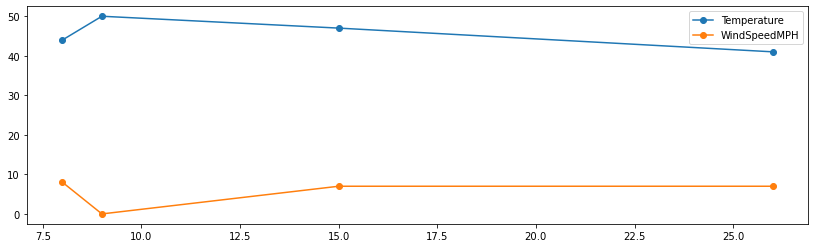

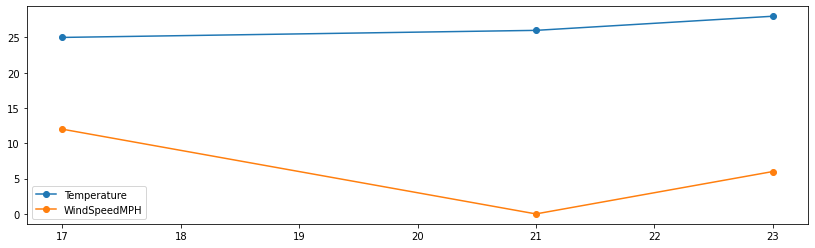

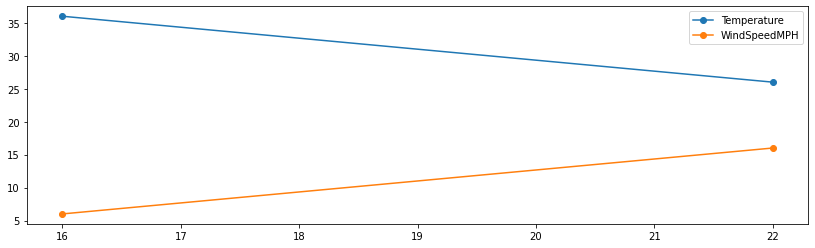

In [489]:
data[['Temperature', 'WindSpeedMPH']][data['Condition'] == 'Rain'].plot(figsize=(14,4),marker='o')
data[['Temperature', 'WindSpeedMPH']][data['Condition'] == 'Snow'].plot(figsize=(14,4),marker='o')
data[['Temperature', 'WindSpeedMPH']][data['Condition'] == 'Fog-Snow'].plot(figsize=(14,4),marker='o')

In [490]:
data.to_csv('./data/weather.csv', columns=['Day','Temperature','Humidity','WindSpeedMPH','Condition'], index=False)